<pre> Projeto de Análise Exploratória - Dataset de vendas de carros colecionáveis </pre>

 * Iniciamos com a **conexão do Colab ao meu Google Drive**, criando uma pasta chamada "*/content/drive*", onde posso colocar arquivos (como CSVs) e acessar meus arquivos - aqui no Colab - como se fossem arquivos locais.

In [2]:
# Conectando o Colab ao Google Drive
## Criação de pasta onde o arquivo CSV deve estar

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Utilizamos o código abaixo para **confirmar que o arquivo CSV está dentro da pasta** criada, que a conexão foi estabelecida.

In [3]:
# Confirmando a conexão entre Colab e Drive pela localização do arquivo CSV na pasta

!ls '/content/drive/MyDrive/csvs_archives/'

sales_data_sample.csv


* Precisamos **importar as bibliotecas** que iremos utilizar - Pandas, Matplotlib e Seaborn.

In [4]:
# Importação das bibliotecas a serem utilizadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos, então, **abrir o dataset** de vendas que vai ser utilizado a partir do meu Google Drive, aproveitando para logo **transformar o arquivo** que está em CSV **em dataframe** e **exibir suas primeiras linhas no console**.

In [24]:
# Abrindo e transformando o arquivo CSV em dataframe
## Exibindo as primeiras linhas do dataframe

# tabela_vendas = pd.read_csv('/content/drive/MyDrive/csvs_archives/sales_data_sample.csv')
## tabela_vendas.head()

A célula anterior apresentou **erro de decodificação do arquivo**, pois reconheceu ele no **formato "utf-8"** e o arquivo acabou não sendo lido.
* Para resolvermos esse problema, usaremos um recurso de encoding do pandas para **ler o CSV corretamente**.

In [7]:
# Encoding em latin1 para corrigir o erro de decodificação do arquivo

tabela_vendas = pd.read_csv('/content/drive/MyDrive/csvs_archives/sales_data_sample.csv', encoding='latin1')

Agora que resolvemos o problema de decodificação, podemos trabalhar com o dataset de vendas.
* Vamos **exibir o arquivo CSV como dataframe, mostrando suas 5 primeiras linhas**.

In [8]:
# Exibindo as primeiras linhas da tabela

tabela_vendas.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Um passo importante para essa análise exploratória inicial é **verificar os valores nulos por coluna**.

In [9]:
# Verificar se existem valores nulos por coluna

tabela_vendas.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


Já que existem valores nulos, precisamos **preencher os valores nulos** que vão interferir em nossa análise.

In [10]:
# Preenchendo os valores nulos encontrados
## Valores nulos em vendas 'SALES' serão preenchidos com "0" (zero)
### Valores nulos em região 'TERRITORY' serão preenchidos com "Não especificado"

tabela_vendas['SALES'] = tabela_vendas['SALES'].fillna(0)
tabela_vendas['TERRITORY'] = tabela_vendas['TERRITORY'].fillna('Não especificado')

**Criaremos uma tabela virtual para substituir os nomes dos continentes** de uma forma que fique mais fácil de entender, por exemplo - APAC por Ásia-Pacífico - **melhora consideravelmente a legibilidade**.

In [11]:
# Criação de tabela virtual para substituir siglas de 'TERRITORY' pelo nome dos continentes
## Modificação feita para facilitar o entendimento em relação aos nomes das respectivas regiões

tabela_virtual = tabela_vendas.copy()
substituir_territorios = {

    'EMEA': 'Europa, Oriente Médio e África',
    'APAC': 'Ásia-Pacífico',
    'Não especificado': 'América do Norte',
    'LATAM': 'América Latina',
    'Japan': 'Ásia-Pacífico',
    'Singapore': 'Ásia-Pacífico',
    'Australia': 'Ásia-Pacífico',
    'Philippines:': 'Ásia-Pacífico',
}

tabela_virtual['TERRITORY'] = tabela_virtual['TERRITORY'].replace(substituir_territorios)

A partir disso, é interessante **gerar uma tabela com as informações de vendas por região geográfica**, melhorando a visualização desses dados.

In [12]:
# Gerando um dataframe relacionando vendas por região, com ordenação decrescente
## Objetivando melhorar a visualização das informações

tabela_vendas_regiao = tabela_virtual.groupby('TERRITORY').sum()
tabela_vendas_regiao = tabela_vendas_regiao[['SALES']].sort_values(by='SALES', ascending=False)
display(tabela_vendas_regiao)

,SALES
TERRITORY,
"Europa, Oriente Médio e África",4979272.41
América do Norte,3852061.39
Ásia-Pacífico,1201295.05


Precisamos calcular o **ticket médio**

Esses dados vão ser muito importantes para o que veremos mais à frente.

In [13]:
# Cálculo do ticket médio = soma de todas as vendas dividida pela quantidade total de pedidos realizados

# Agregar colunas 'ORDERNUMBER' e 'SALES' em uma tabela virtual
## Contar o número de valores únicos na coluna 'ORDERNUMBER' para saber o total de pedidos
## Somar os valores de vendas (da coluna 'SALES')
### Renomear - na tabela virtual de agregação - 'ORDERNUMBER' para 'Pedidos' e 'SALES' para 'Vendas Totais'

vendas_totais = tabela_virtual.agg({
    'ORDERNUMBER': pd.Series.nunique,
    'SALES': 'sum'
}).rename({
    'ORDERNUMBER': 'Pedidos',
    'SALES': 'Vendas Totais'
})

ticket_medio_geral = vendas_totais['Vendas Totais'] / vendas_totais['Pedidos']
ticket_medio_geral

np.float64(32679.57280130293)

Conseguimos também calcular o **número de pedidos** e o **valor das vendas totais.**

In [14]:
# Calcular o número de pedidos separadamente do cálculo do ticket médio

num_pedidos = tabela_virtual['ORDERNUMBER'].nunique()
num_pedidos

307

In [15]:
# Calculando também o valor de vendas totais separadamente do cálculo do ticket médio

vendas_totais = tabela_virtual['SALES'].sum()
vendas_totais

np.float64(10032628.85)

Podemos calcular o **ticket médio por região** também.

In [16]:
# Calcular o ticket médio por território: vendas totais por território dividido pela quantidade de pedidos por território

# Agrupando as colunas referentes às regiões, ao número de pedidos de pedidos e às vendas totais em uma tabela virtual
## Renomeando 'ORDERNUMBER' para 'Pedidos', somando o total de vendas 'SALES' dentro desse novo dataframe

ticket_medio_territorio = tabela_virtual.groupby('TERRITORY').agg({
    'ORDERNUMBER': pd.Series.nunique,
    'SALES': 'sum'
}).rename(columns={'ORDERNUMBER': 'Pedidos'}).reset_index()

ticket_medio_territorio['Ticket Médio'] = ticket_medio_territorio['SALES'] / ticket_medio_territorio['Pedidos']
ticket_medio_territorio = ticket_medio_territorio.sort_values('Ticket Médio', ascending=False)
ticket_medio_territorio

,TERRITORY,Pedidos,SALES,Ticket Médio
1,"Europa, Oriente Médio e África",151,4979272.41,32975.313974
2,Ásia-Pacífico,37,1201295.05,32467.433784
0,América do Norte,119,3852061.39,32370.263782


Podemos gerar um gráfico para visualizar esses dados.

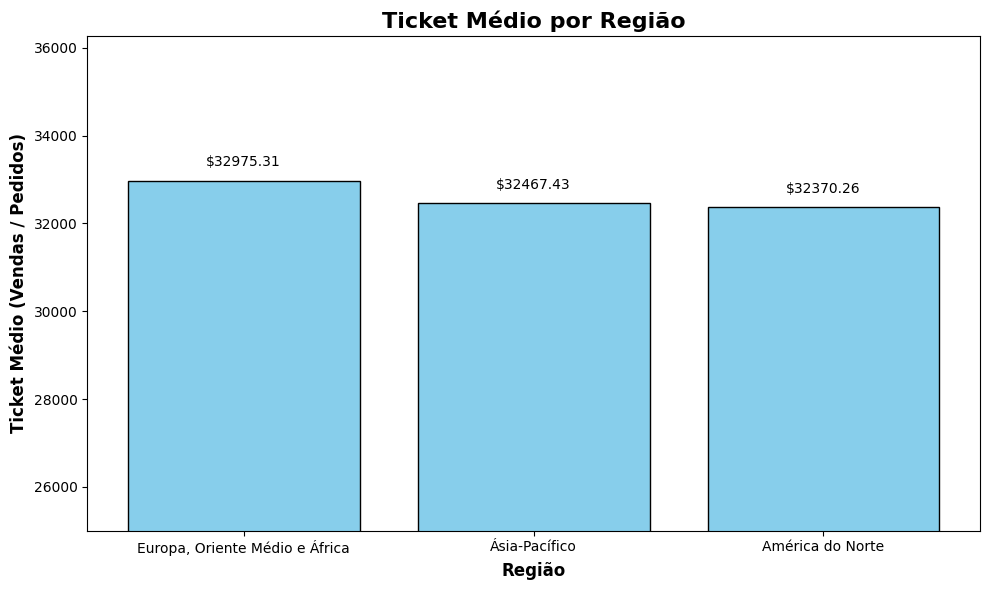

In [18]:
# Gerar gráfico de barras para melhor visualizar a relação de ticket médio por região

x = ticket_medio_territorio['TERRITORY']
y = ticket_medio_territorio['Ticket Médio']

plt.figure(figsize=(10,6))
plt.bar(x, y, color='skyblue', edgecolor='black')

plt.title('Ticket Médio por Região', fontweight='bold', fontsize=16)
plt.xlabel('Região', fontweight='bold', fontsize=12)
plt.ylabel('Ticket Médio (Vendas / Pedidos)', fontweight='bold', fontsize=12)

plt.xticks(rotation=0)

for i, v in enumerate(y):
    plt.text(i, v + (v*0.01), f"${v:.2f}", ha='center', fontsize=10)

plt.ylim(25000, max(y) * 1.1)
plt.tight_layout()
plt.show()

Chegamos na parte central do meu papel neste projeto: **mapear, analisar e trazer possíveis insights a partir dos Status dos pedidos.**

* Iremos, então, **verificar a quantidade de pedidos por Status**.

*Isso ajuda a entender o desempenho geral da empresa, se existem problemas operacionais ou não; e também permite verificar se existem erros de escrita nos dados.*

In [21]:
# Descobrir os valores distintos da coluna 'STATUS' (pode checar valores ausentes também)

tabela_vendas['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [20]:
# Contar e mostrar a frequência de cada status do dataframe

tabela_vendas['STATUS'].value_counts()

,count
STATUS,
Shipped,2617
Cancelled,60
Resolved,47
On Hold,44
In Process,41
Disputed,14


Podemos **gerar um gráfico para visualizar melhor** esses dados.

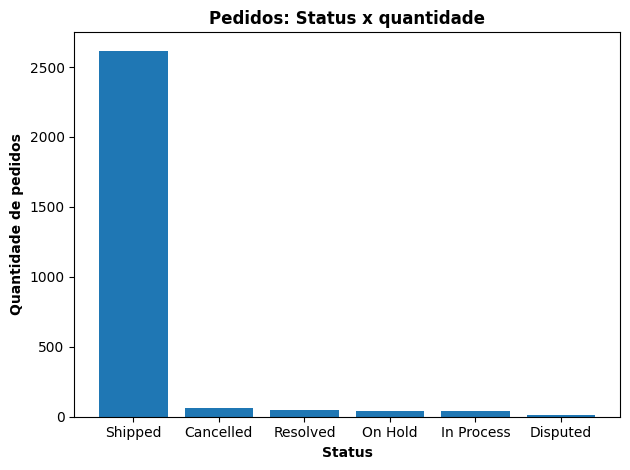

In [22]:
# Gerando um gráfico de barras para visualizar a relação do status do pedido e a quantidade total de pedidos

tabela_vendas_temp = tabela_vendas.copy()
tabela_vendas_temp = tabela_vendas['STATUS'].value_counts()

fig, ax = plt.subplots()

ax.bar(tabela_vendas_temp.index, tabela_vendas_temp.values)
ax.set_title('Pedidos: Status x quantidade', fontweight='bold', fontsize=12)

plt.xlabel('Status', fontweight='bold', fontsize=10)
plt.ylabel('Quantidade de pedidos', fontweight='bold', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Agora, é importante **calcular a taxa de cancelamento**, mesmo não parecendo significativa frente ao tamanho da barra de "Shipped", referente aos pedidos enviados.

A taxa de cancelamento é **a porcentagem de pedidos cancelados em relação ao número de pedidos totais**.

*Se houver uma alta taxa de cancelamento, isso pode indicar falhas no processo de venda, estoque ou até problemas de comunicação com os clientes.*

In [23]:
# Cálculo da taxa de cancelamento (em porcentagem): quantidade de pedidos cancelados dividido pela quantidade de pedidos totais

## Criar máscara booleana onde é True somente nas linhas correspondentes que tenham 'Cancelled' na coluna 'STATUS'

cancelados = tabela_vendas[tabela_vendas['STATUS'] == 'Cancelled'].shape[0]
total = tabela_vendas.shape[0]
taxa_cancelamento = cancelados / total
taxa_cancelamento

0.021253985122210415

Representando o resultado do cálculo em porcentagem, podemos arredondar para 2,13%, o que, em geral, seria considerada uma baixa taxa de cancelamento. No entanto, neste caso não podemos colocar essa hipótese como absoluta por diversos fatores.

Esse dataset se refere a vendas de carros colecionáveis, então, a primeira coisa a se fazer é analisar o contexto do negócio ponto a ponto juntamente com essa taxa de cancelamento:
* Se há um baixo volume de vendas totais, cada venda pode envolver altos custos logísticos, burocráticos e contratuais. Esses cancelamentos podem representar perda significativa de tempo e recursos. Felizmente não é o caso da nossa empresa, pois já calculamos o volume de vendas totais e ele é considerado alto.
* Com um alto ticket médio e margens estreitas. Como carros colecionáveis geralmente têm valores muito altos, um único cancelamento pode significar grande perda de receita prevista, custo com transporte, vistoria, preparação, publicidade, além do impacto no fluxo de caixa se o cancelamento ocorre próximo à entrega. Mais uma vez não é o caso da empresa, pois calculamos seu ticket médio e seu valor fica abaixo da média global, que é U$ 33K.

Essa modalidade de venda é **demorada e personalizada**, envolvendo documentação internacional, a raridade do item, podendo envolver customizações, demora para recolocar o carro no mercado. Cada cancelamento gera retrabalho e pode desvalorizar o carro pela exposição repetida no mercado.

Isso ocorre porque **em mercados de colecionáveis, a exclusividade é crucial.** Um carro reservado e depois cancelado pode ter perdido o comprador ideal. O cancelamento atrasa outras possíveis vendas e gera perda de *momentum de mercado.*

Nesse nicho, **a confiança é essencial**, um cancelamento pode significar problemas na experiência com o cliente, representando **riscos à reputação da empresa**.

É necessário **fazer uma análise qualitativa** para descobrir o motivo dos cancelamentos, **qual o impacto financeiro de cada cancelamento, se existe um padrão nesse cancelamento** - por exemplo, com um *tipo específico de carro*, se acontece mais com algum *vendedor*, em alguma *época do ano*, através de algum *canal*.

*Não podemos apenas calcular a taxa de cancelamento e considerá-la baixa em termos absolutos sem analisar outros fatores que envolvem o negócio e seu contexto.*